# Setup and Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
# Load the CSV file into a DataFrame
file_path = 'mapping_transac_publisher_tv.csv'  # Update with your file's correct path
df_mapping_transact_publisher = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
display(df_mapping_transact_publisher.head(10))

,customer_id,dsp_id,device_id
0,reFs5GI87lXJkJSi9r,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho
1,reTjziox2cSrxVq70Y,dspCSu1n1mhys37Na5OXMaKaE8P8CS,ctvHmkxqZXBg
2,reOrpt9vhSwhbPVtni,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,ctvwp5n34myx
3,reutQ3jiBX9Li4Ggqi,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,ctvdkYC70D2x
4,reH7UgH29AreRh8wWy,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,ctvTgbqnhRd8
5,reHAnmLXgIZqJT0i64,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,ctvWjRSFfqf9
6,unknown,dspGjtT1HFP93mdV0azFnq3d9RWimz,NaN
7,reIYreUnTRc6yFflWy,dsp5g1hhUvLR4MjLQuI0UTQXbmQx4R,ctv5yal7dewi
8,reDzpCoOpWJc5l9K3y,unknown,ctv9sCxrEjFD
9,reEW1KfvG7XlTbXwa6,dsp209Hn140h3HQO3sDplynIC1HfS4,ctvywJV5bzru


In [4]:
print(len(df_mapping_transact_publisher))

7984411


In [9]:
print(df_mapping_transact_publisher.dtypes)

customer_id    object
dsp_id         object
device_id      object
dtype: object


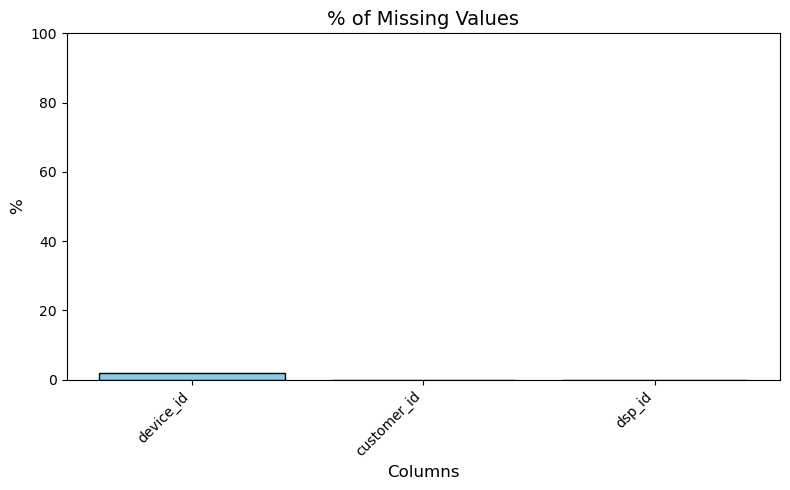

             Missing Count  Missing Percentage (%)
device_id           158701                1.987636
customer_id              0                0.000000
dsp_id                   0                0.000000


In [10]:
def count_missing_values_summary(df):
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100
    missing_columns = missing_counts[missing_counts > 0]
    missing_summary = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percentage}
    ).sort_values(by='Missing Count', ascending=False)
    
    # Create the histogram
    plt.figure(figsize=(8, 5))
    plt.ylim(0, 100)
    plt.bar(missing_summary.index, missing_summary['Missing Percentage (%)'], color='skyblue', edgecolor='black')
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('%', fontsize=12)
    plt.title('% of Missing Values', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return missing_summary

# Example usage
summary = count_missing_values_summary(df_mapping_transact_publisher)
print(summary)

#### Analyse 'device_id' to figure out where the missing values are listed.

In [11]:
# Check for rows with null values
null_rows = df_mapping_transact_publisher[df_mapping_transact_publisher.isnull().any(axis=1)]

# Display the rows with null values
print("\nRows with Null Values:")
print(null_rows)


Rows with Null Values:
        customer_id                          dsp_id device_id
6           unknown  dspGjtT1HFP93mdV0azFnq3d9RWimz       NaN
41          unknown  dspj2u01TFJSqeyxLmLAJWZYlntHlA       NaN
60          unknown  dspC0yLixe7ItI8NZK0Mi3z6qKoZQ4       NaN
65          unknown  dspMxyQVmUXaJbdPuCQElVwUicT7aE       NaN
108         unknown  dsph0p8ZctktLye389DnMS8sD7UMHw       NaN
...             ...                             ...       ...
7984233     unknown                         unknown       NaN
7984303     unknown  dspeh7veC2iKMjXM8X7anfSK2z3O52       NaN
7984320     unknown  dsp4l4E7CkZkdNCmVh3Dpt1CAaLLU9       NaN
7984349     unknown  dspgZ6zvh0Fy0CI4EaVSlYEf0W68Bu       NaN
7984356     unknown  dspacGdpCJ2QhaKbTH2HKToRcDiBdH       NaN

[158701 rows x 3 columns]


In [12]:
# Analyze null values in each column
print("\nNull Value Counts by Column:")
print(df_mapping_transact_publisher.isnull().sum())


Null Value Counts by Column:
customer_id         0
dsp_id              0
device_id      158701
dtype: int64


In [13]:
# Check the distribution of null values with respect to 'customer_id' and 'dsp_id'
print("\nNull Value Distribution with Respect to 'customer_id':")
print(null_rows['customer_id'].value_counts(dropna=False))

print("\nNull Value Distribution with Respect to 'dsp_id':")
print(null_rows['dsp_id'].value_counts(dropna=False))


Null Value Distribution with Respect to 'customer_id':
customer_id
unknown    158701
Name: count, dtype: int64

Null Value Distribution with Respect to 'dsp_id':
dsp_id
unknown                           17491
dspGjtT1HFP93mdV0azFnq3d9RWimz        1
dspNAnPYtwogpHXjvIqJmfYNms1JUK        1
dsphz2E3wIApMZDC4siwNkrGgxgC4Y        1
dspyEFatfJLJYfnyMaALCsW4MBT4FM        1
                                  ...  
dspVuhGouweBJsfhiT279JfpEliu5P        1
dsp2k2J5LxFD4Jft6qoz8UNp05s8vP        1
dsp40EyNFhknD2VM1osUyVAx2G3cnR        1
dsplue8VSZ74QegpV1z8gF0XVgzffu        1
dspacGdpCJ2QhaKbTH2HKToRcDiBdH        1
Name: count, Length: 141211, dtype: int64


#### Decision: Drop Missing values of 'device_id'

In [16]:
df_mapping_transact_publisher_cleaned = df_mapping_transact_publisher.dropna()

In [18]:
df_mapping_transact_publisher_cleaned.shape

(7825710, 3)